<a href="https://colab.research.google.com/github/Sanaz-salari/Deep-Learning/blob/main/IE7860_Plasma_Recognition_Regression_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Process Modelling Assignment- Reactive-ION Plasma Etching Process:**

This problem is a multi-input and multi-output regression issue that we would like to solve by SVM algorithm. This is a regression problem since it involves four numerical continuous output variables which we want to predict as target values. The task here is to design and train an SVM to minimize the error between actual and predicted output values. We have 53 input-output data pairs, 6 features, and 4 outputs. The steps I did from beginning to end will be explained in the following.

In [ ]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving Plasma_Dataset.csv to Plasma_Dataset.csv


In [ ]:
#Load data set
df = pd.read_csv('Plasma_Dataset.csv')


In [ ]:
df.head()

,run,pressure,rf_power,electrode_gap,cci_flow,he_flow,o2_flow,etch_rate,etch_uniformity,oxide_selectivity,photoresist_selectivity
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


 ***Exploratory data analysis ***
 
 Now, I will explore the data to gain insights about the data.

In [ ]:
# view dimensions of dataset
df.shape

(53, 11)

In [ ]:
df.describe()

,run,pressure,rf_power,electrode_gap,cci_flow,he_flow,o2_flow,etch_rate,etch_uniformity,oxide_selectivity,photoresist_selectivity
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,27.000000,250.000000,350.000000,1.518868,124.962264,124.056604,15.000000,4204.283019,11.635849,6.988302,2.226981
std,15.443445,45.641159,45.641159,0.285588,22.871684,62.203579,4.574175,689.441535,10.648241,2.186921,0.541315
min,1.000000,131.000000,231.000000,0.800000,64.000000,0.000000,3.000000,2704.000000,0.500000,2.650000,1.320000
25%,14.000000,200.000000,300.000000,1.200000,100.000000,50.000000,10.000000,3684.000000,3.900000,5.840000,1.970000
50%,27.000000,250.000000,350.000000,1.500000,125.000000,125.000000,15.000000,4390.000000,8.300000,6.410000,2.100000
75%,40.000000,300.000000,400.000000,1.800000,150.000000,200.000000,20.000000,4703.000000,15.100000,7.720000,2.310000
max,53.000000,369.000000,469.000000,2.200000,184.000000,200.000000,27.000000,5515.000000,55.200000,15.150000,4.170000


In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   run                      53 non-null     int64  
 1   pressure                 53 non-null     int64  
 2   rf_power                 53 non-null     int64  
 3   electrode_gap            53 non-null     float64
 4   cci_flow                 53 non-null     int64  
 5   he_flow                  53 non-null     int64  
 6   o2_flow                  53 non-null     int64  
 7   etch_rate                53 non-null     int64  
 8   etch_uniformity          53 non-null     float64
 9   oxide_selectivity        53 non-null     float64
 10  photoresist_selectivity  53 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 4.7 KB


In [ ]:
df.drop(['run'], axis = 1, inplace = True)
df.head()

,pressure,rf_power,electrode_gap,cci_flow,he_flow,o2_flow,etch_rate,etch_uniformity,oxide_selectivity,photoresist_selectivity
0,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


We can see that there are no missing values in the dataset and all the variables are numerical variables.

We can also plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)

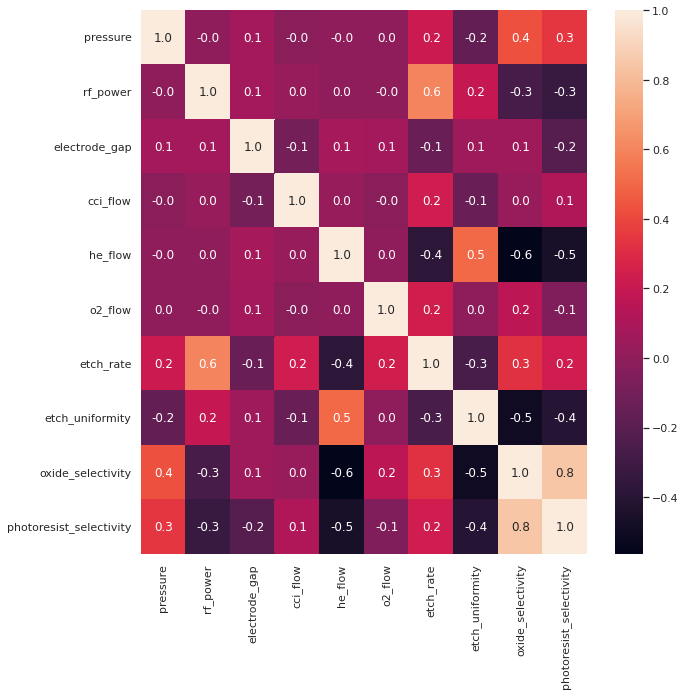

In [ ]:
import seaborn as sn
f= plt.subplots(figsize=(10,10))
sn.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

As we see in the above heatmap, most of the features are high related with one of the output targets which is etch_rate. Two of the targets, oxide_selectivity and photoresist_selectrivity are highly correlated. For pressure as a preditor variable, the most correlations are 0.4 and 0.3 with two of the targets,oxide_selectivity and photoresist_selectrivity, respectively. rf_power has the most correlation of 0.6 with etch_rate. he_flow has three most high correlation of -0.6, -0.5, 0.5, and -0.4 with oxide_selectivity, photoresist_selectrivity, etch_uniformity, and etch_rate, respectively. Tere are also highly correlations between target variables. I cannot say if these high correlations between predictors and targets are good for our study or not.

**Declare feature vector and target variable**

In [ ]:
#Split data into training and test sets
#Train dataset:
df2 = df.copy()
df2_x = df.sample(frac=0.8, random_state=0)
df2_y = df2_x[['etch_rate','etch_uniformity','oxide_selectivity','photoresist_selectivity']]
df2_x.drop(['etch_rate','etch_uniformity','oxide_selectivity','photoresist_selectivity'], axis = 1, inplace = True)
print(df2_x.shape, df2_y.shape)

(42, 6) (42, 4)


In [ ]:
#Test dataset:
df2_x_test = df.drop(df2_x.index)
df2_y_test = df2_x_test[['etch_rate','etch_uniformity','oxide_selectivity','photoresist_selectivity']]
df2_x_test.drop(['etch_rate','etch_uniformity','oxide_selectivity','photoresist_selectivity'], axis = 1, inplace = True)
print(df2_x_test.shape, df2_y_test.shape)

(11, 6) (11, 4)


**Summary of numerical variables**

Train dataset has 42 numerical datapoints.

Train dataset has 11 numerical datapoints.

y variables are target variables. 

There are no missing values in the dataset.

**Outliers:**

On closer inspection, we can suspect that all the continuous variables may contain outliers. I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'photoresist_selectivity')

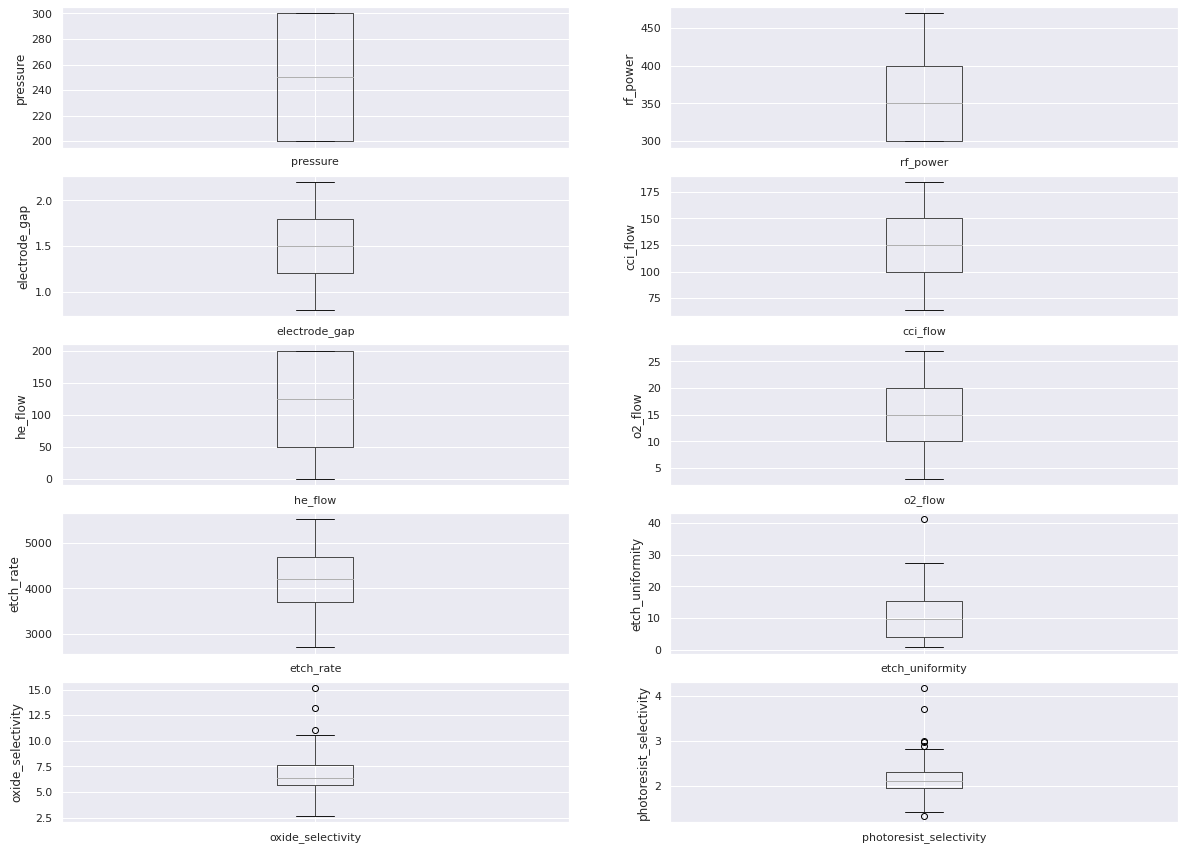

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,15))


plt.subplot(5, 2, 1)
fig = df2_x.boxplot(column='pressure')
fig.set_title('')
fig.set_ylabel('pressure')


plt.subplot(5, 2, 2)
fig = df2_x.boxplot(column='rf_power')
fig.set_title('')
fig.set_ylabel('rf_power')


plt.subplot(5, 2, 3)
fig = df2_x.boxplot(column='electrode_gap')
fig.set_title('')
fig.set_ylabel('electrode_gap')


plt.subplot(5, 2, 4)
fig = df2_x.boxplot(column='cci_flow')
fig.set_title('')
fig.set_ylabel('cci_flow')


plt.subplot(5, 2, 5)
fig = df2_x.boxplot(column='he_flow')
fig.set_title('')
fig.set_ylabel('he_flow')


plt.subplot(5, 2, 6)
fig = df2_x.boxplot(column='o2_flow')
fig.set_title('')
fig.set_ylabel('o2_flow')


plt.subplot(5, 2, 7)
fig = df2_y.boxplot(column='etch_rate')
fig.set_title('')
fig.set_ylabel('etch_rate')


plt.subplot(5, 2, 8)
fig =df2_y.boxplot(column='etch_uniformity')
fig.set_title('')
fig.set_ylabel('etch_uniformity')

plt.subplot(5, 2, 9)
fig = df2_y.boxplot(column='oxide_selectivity')
fig.set_title('')
fig.set_ylabel('oxide_selectivity')

plt.subplot(5, 2, 10)
fig = df2_y.boxplot(column='photoresist_selectivity')
fig.set_title('')
fig.set_ylabel('photoresist_selectivity')


The above boxplots confirm that there are no outliers in train input variables but there are outliers in train output variables including etch_uniformity, oxide_selectivity, and photoresist_selectivity. Also, most of the variables have a skewed distribution not normal distribution. When we see skeweness, it means we need to do normalizatyion to bring all values of a column closer to each other by subtracting min value or mean value. Also, when different variables have different values, it means a column is more weighted compared to other. There, we need to do normalization, as well.

In this link, boxplots are clearly explained:

(https://simplypsychology.org/boxplots.html)


Text(0, 0.5, 'photoresist_selectivity')

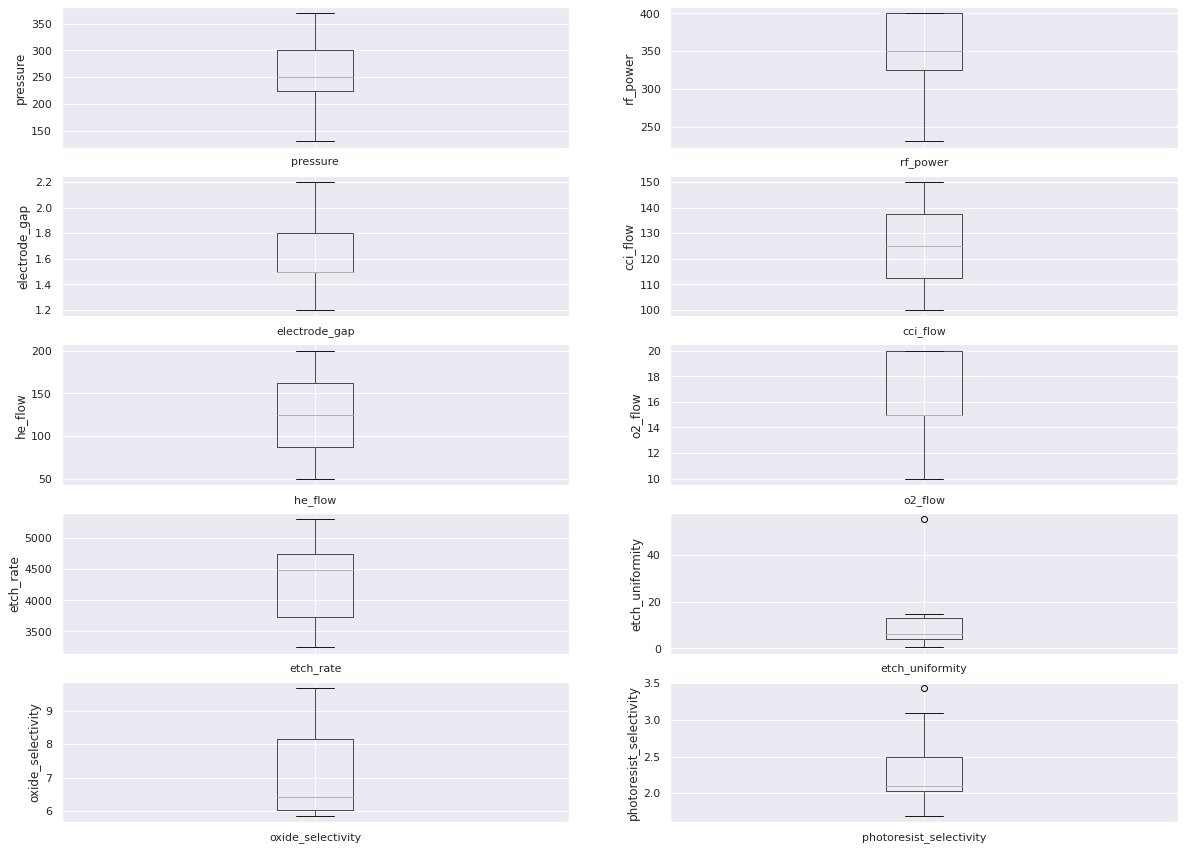

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,15))


plt.subplot(5, 2, 1)
fig = df2_x_test.boxplot(column='pressure')
fig.set_title('')
fig.set_ylabel('pressure')


plt.subplot(5, 2, 2)
fig = df2_x_test.boxplot(column='rf_power')
fig.set_title('')
fig.set_ylabel('rf_power')


plt.subplot(5, 2, 3)
fig = df2_x_test.boxplot(column='electrode_gap')
fig.set_title('')
fig.set_ylabel('electrode_gap')


plt.subplot(5, 2, 4)
fig = df2_x_test.boxplot(column='cci_flow')
fig.set_title('')
fig.set_ylabel('cci_flow')


plt.subplot(5, 2, 5)
fig = df2_x_test.boxplot(column='he_flow')
fig.set_title('')
fig.set_ylabel('he_flow')


plt.subplot(5, 2, 6)
fig = df2_x_test.boxplot(column='o2_flow')
fig.set_title('')
fig.set_ylabel('o2_flow')


plt.subplot(5, 2, 7)
fig = df2_y_test.boxplot(column='etch_rate')
fig.set_title('')
fig.set_ylabel('etch_rate')


plt.subplot(5, 2, 8)
fig =df2_y_test.boxplot(column='etch_uniformity')
fig.set_title('')
fig.set_ylabel('etch_uniformity')

plt.subplot(5, 2, 9)
fig = df2_y_test.boxplot(column='oxide_selectivity')
fig.set_title('')
fig.set_ylabel('oxide_selectivity')

plt.subplot(5, 2, 10)
fig = df2_y_test.boxplot(column='photoresist_selectivity')
fig.set_title('')
fig.set_ylabel('photoresist_selectivity')

The above boxplots confirm that there are no outliers in train input variables but there are outliers in train output variables including etch_uniformity, and photoresist_selectivity. Also, most of the variables have a skewed distribution not normal distribution.

**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

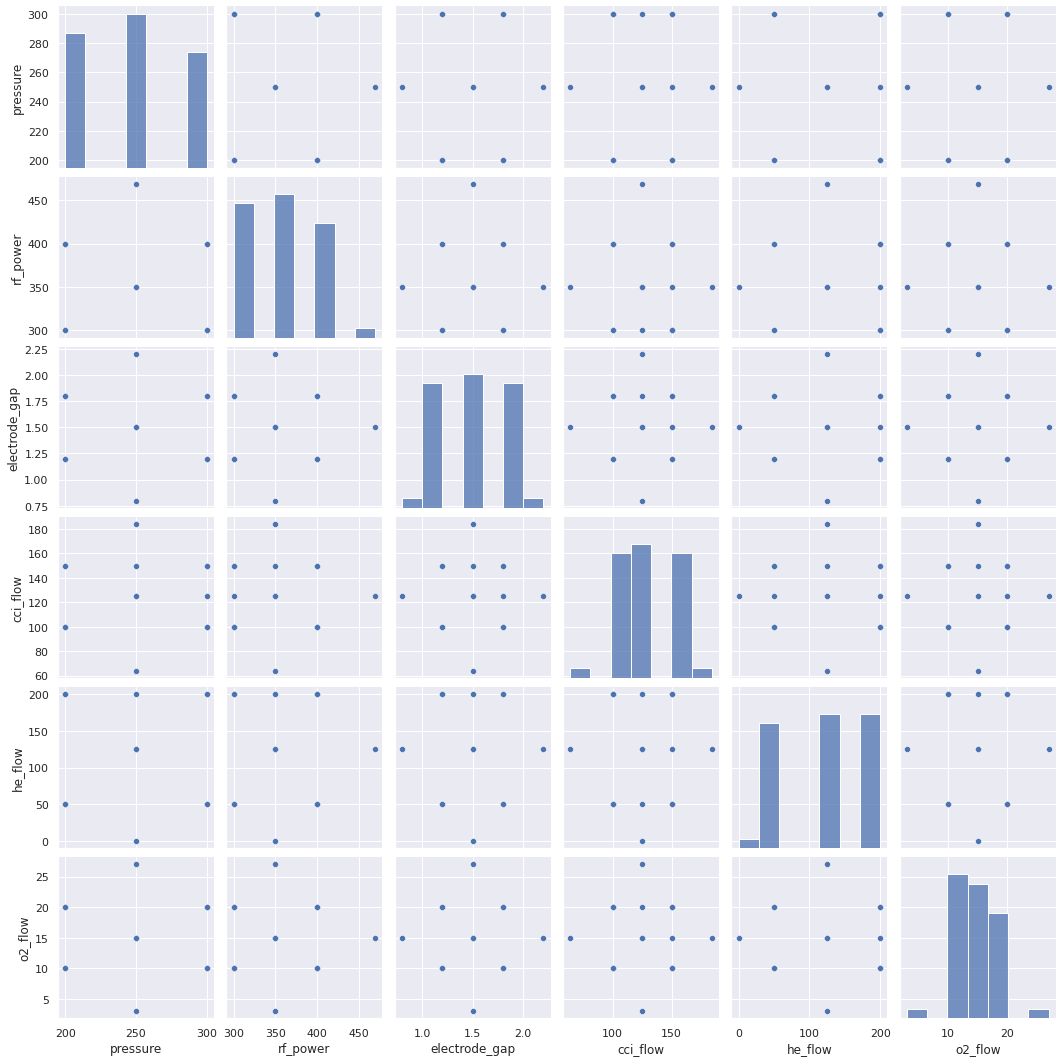

In [ ]:
sns.pairplot(df2_x[['pressure', 'rf_power', 'electrode_gap', 'cci_flow', 'he_flow', 'o2_flow']])

We can see that this figure confirms the result that we got in previous section that most of the input variables are skewed.

**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

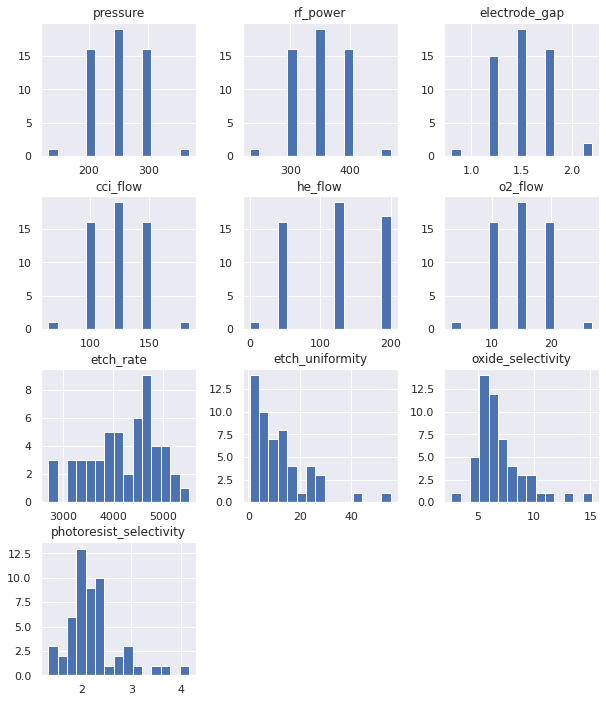

In [ ]:
# plot histogram to check distribution

df.hist(figsize=(10,12),bins = 15)
plt.title("Features Distribution")
plt.show()

We can see that some of the predictor variables and all the target variables are skewed.

**Feature Scaling**

A standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a iris data matrix to the [0, 1] range:

In [ ]:
cols = df2_x.columns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(df2_x) #fit means training the model which is done on training data, by using this line df2_x will be an array not a dataframe
X_train.dtype

dtype('float64')

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [ ]:
X_test = scaler.transform(df2_x_test) #The output is an array
X_test
X_test.dtype

dtype('float64')

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols]) #Convert numpy array to dataframe, we do this since we want to add this dataframe to the other dataframe and make a new dataframe

In [ ]:
X_train.describe()

,pressure,rf_power,electrode_gap,cci_flow,he_flow,o2_flow
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.476190,0.298535,0.500000,0.507937,0.619048,0.480159
std,0.397437,0.259988,0.203259,0.199304,0.319528,0.198282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.285714,0.300000,0.250000,0.291667
50%,0.500000,0.295858,0.500000,0.508333,0.625000,0.500000
75%,1.000000,0.591716,0.714286,0.716667,1.000000,0.708333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols]) #Convert numpy array to dataframe

In [ ]:
df2_y.head()

,etch_rate,etch_uniformity,oxide_selectivity,photoresist_selectivity
43,4643,7.3,6.93,2.28
32,4439,2.9,15.15,3.71
38,5139,4.7,6.61,2.99
33,4975,1.2,7.95,2.42
11,3396,15.1,4.99,2.09


One challenge of solving SVM for regression problem with int and float values for target variables (not predictor variables) is that SVM classifier cannot work with such values. So, we need to encode these values to convert them to only numeric values. Then, train SVM on it.

In [ ]:
# Convert train target values to numeric using encoder
trainingScores = np.zeros((42,4)) #zero numpy array with shape of 42*4 
encoded_y= np.zeros((42,4))
lab_enc = preprocessing.LabelEncoder()
for i in range(0,4):
  trainingScores[:,i] = np.array(df2_y.iloc[:,i])
  encoded_y[:,i] = lab_enc.fit_transform(trainingScores[:,i])
print(encoded_y)

[[29. 14. 26. 21.]
 [24.  6. 40. 31.]
 [39.  9. 23. 30.]
 [36.  2. 32. 25.]
 [ 5. 27.  4. 14.]
 [35. 34.  6.  5.]
 [ 3. 35.  0.  1.]
 [22. 25. 30. 11.]
 [ 2. 28.  9.  8.]
 [12.  5. 37. 29.]
 [38. 23. 10. 17.]
 [ 1. 24.  1.  1.]
 [ 9. 27. 14. 15.]
 [33.  4. 27. 20.]
 [32.  3. 20.  5.]
 [17. 30. 24. 16.]
 [21. 36. 15.  4.]
 [18. 18. 11.  6.]
 [10.  0. 25. 13.]
 [26. 32.  7. 10.]
 [41. 13. 21.  9.]
 [ 4. 31.  8. 12.]
 [34. 15. 31. 19.]
 [16. 12. 12. 22.]
 [ 0. 37.  2.  2.]
 [ 6. 11. 22. 21.]
 [11. 33. 18. 18.]
 [ 8. 22. 13. 10.]
 [27. 19. 29. 21.]
 [19. 29.  3.  3.]
 [28. 16. 33. 24.]
 [ 7. 17. 19.  0.]
 [37.  7. 35. 23.]
 [25. 20. 38. 28.]
 [14.  4. 39. 32.]
 [30. 10. 27. 20.]
 [15. 21. 28. 11.]
 [13.  8. 16.  7.]
 [20. 38.  5. 26.]
 [31.  3. 36. 27.]
 [23. 26. 17.  9.]
 [40.  1. 34. 12.]]


In [ ]:
type(encoded_y)

numpy.ndarray

In [ ]:
encoded_y.dtype # check the data type of an array

dtype('float64')

In [ ]:
#Convert train target array to dataframe 
encoded_df = pd.DataFrame(encoded_y)
type(encoded_df)

pandas.core.frame.DataFrame

In [ ]:
# Convert test target values to numeric using encoder
trainingScores1 = np.zeros((11,4)) #zero numpy array with shape of 42*4 
encoded_y_test= np.zeros((11,4))
lab_enc = preprocessing.LabelEncoder()
for i in range(0,4):
  trainingScores1[:,i] = np.array(df2_y_test.iloc[:,i])
  encoded_y_test[:,i] = lab_enc.fit_transform(trainingScores1[:,i])
print(encoded_y_test)

[[ 2.  8.  6.  2.]
 [ 7.  6.  2.  6.]
 [10.  0.  9.  9.]
 [ 0.  7.  1.  5.]
 [ 9.  9.  3.  0.]
 [ 5. 10.  0.  1.]
 [ 1.  2.  8. 10.]
 [ 8.  4. 10.  8.]
 [ 4.  3.  5.  3.]
 [ 6.  1.  7.  7.]
 [ 3.  5.  4.  4.]]


In [ ]:
#Convert test target values to dataframe
encoded_df1 = pd.DataFrame(encoded_y_test)
type(encoded_df1)

pandas.core.frame.DataFrame

**Run SVM with default hyperparameters**

We have support vector classifiers. I will use two of them:'linear' and 'RBF' classifiers

The following is a default hyperparameter SVM.

In [ ]:
# import SVC classifier
from sklearn import svm

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


#Simply fit the values of X and Y
for i in range(0,4):
  # instantiate classifier with default hyperparameters
  clf = svm.SVC()
  clf.fit(df2_x, encoded_df.iloc[:,i])


# make predictions on test set
  y_pred=clf.predict(df2_x_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(encoded_df1.iloc[:,i], y_pred)))

Model accuracy score with default hyperparameters: 0.0000
Model accuracy score with default hyperparameters: 0.0909
Model accuracy score with default hyperparameters: 0.0000
Model accuracy score with default hyperparameters: 0.0000


As we see, the accuracy scores with SVM default hyperparameters are extremely low. So, we need to tune hyperparameters.

Now determining parameters for the SVM model. The **GridSearchCV** utility from sklearn is perfect here.

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

gsc = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid={
        'C': range(1, 100),
        'epsilon': (0.06, 0.08, 0.1),
    },
    cv=5
)
for i in range(0,i):
  grid_result = gsc.fit(df2_x, encoded_df.iloc[:,i])

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.583974 using {'C': 99, 'epsilon': 0.07}


Plot the relation between the SVM parameters

Text(0.5, 0, 'Score')

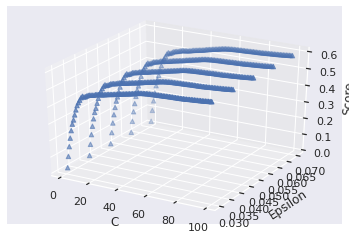

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([row['C'] for row in grid_result.cv_results_['params']],
           [row['epsilon'] for row in grid_result.cv_results_['params']],
           grid_result.cv_results_['mean_test_score'],
           c='b', marker='^')

ax.set_xlabel('C')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Score')